In [2]:
import cv2
import numpy as np
import pandas as pd
import random
from PIL import Image
import imageio
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('opencv_practice/images/t.jfif', cv2.IMREAD_GRAYSCALE)
countAll, countLow = 0, 0
for row in image:
    for cell in row:
        countAll += 1
        if cell < 128:
            countLow += 1
print(countLow/countAll)


0.28906569886469385


In [4]:
df = pd.read_csv("0.dataSet/empAll.csv")
df['COMM'].fillna(0,inplace=True)
df

# df = pd.DataFrame(np.random.randint(0,12, size=(12,4)), index = datas, columns = ['A','B','C','D'])?

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
0,7369,SMITH,CLERK,7902.0,12-17-1980,800,0.0,20
1,7499,ALLEN,SALESMAN,7698.0,2-20-1981,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,2-22-1981,1250,500.0,30
3,7566,JONES,MANAGER,7839.0,4-2-1981,2975,0.0,20
4,7654,MARTIN,SALESMAN,7698.0,9-28-1981,1250,1400.0,30
5,7698,BLAKE,MANAGER,7839.0,5-1-1981,2850,0.0,30
6,7839,KING,PRESIDENT,NaN,11-17-1981,5000,0.0,10
7,7844,TURNER,SALESMAN,7698.0,9-8-1981,1500,0.0,30
8,7900,JAMES,CLERK,7698.0,12-3-1981,950,0.0,30
9,7902,FORD,ANALYST,7566.0,12-3-1981,3000,0.0,20


In [5]:
df.COMM

0        0.0
1      300.0
2      500.0
3        0.0
4     1400.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
Name: COMM, dtype: float64

In [6]:
print('전체 예산 : ' + str(df['COMM'].sum() + df['SAL'].sum()))


전체 예산 : 24675.0


In [7]:
image = cv2.imread('opencv_practice/images/t.jfif', cv2.IMREAD_GRAYSCALE)
imageDF = pd.DataFrame(image)
print('720*1194 짜리 사진 파일의 명도 맵')
imageDF

720*1194 짜리 사진 파일의 명도 맵


,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
0,250,250,250,250,250,250,250,250,250,250,...,242,242,242,242,242,242,242,242,242,242
1,250,250,250,250,250,250,250,250,250,250,...,242,242,242,242,242,242,242,242,242,242
2,250,250,250,250,250,250,250,250,250,250,...,242,242,242,242,242,242,242,242,242,242
3,250,250,250,250,250,250,250,250,250,250,...,242,242,242,242,242,242,242,242,242,242
4,250,250,250,250,250,250,250,250,250,250,...,242,242,242,242,242,242,242,242,242,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,252,252,253,253,253,253,254,254,254,254,...,245,245,246,246,246,246,246,246,246,246
1190,252,252,253,253,253,253,254,254,253,253,...,247,247,246,246,246,246,246,246,246,246
1191,252,252,253,253,253,253,254,254,253,253,...,250,250,246,246,246,246,246,246,246,246
1192,253,253,253,253,253,253,253,253,253,253,...,251,248,248,247,245,245,246,246,246,245


In [33]:
dfalt = imageDF.copy()
for i in imageDF:
    if imageDF[i].var() > 100: # 표준편차 톨러런스 주기 나름/ 여기선 100, 깨끗한 이미지에서는 이정도로도 경계 확인 가능
        dfalt[i] = 0
        break

for i in reversed(list(imageDF)):
    if imageDF[i].var() > 100: # 우측에서부터 찾기
        dfalt[i] = 0
        break
        
for index, row in imageDF.iterrows():
    if row.var() > 100: # 위에서 아래로 찾기
        dfalt.loc[index] = 0
        break

for index, row in reversed(list(imageDF.iterrows())):
    if row.var() > 100: # 아래에서 위로 찾기
        dfalt.loc[index] = 0
        break    
        
dfalt.loc[0]

dfalt

,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
0,250,250,250,250,250,250,250,250,250,250,...,242,242,242,242,242,242,242,242,242,242
1,250,250,250,250,250,250,250,250,250,250,...,242,242,242,242,242,242,242,242,242,242
2,250,250,250,250,250,250,250,250,250,250,...,242,242,242,242,242,242,242,242,242,242
3,250,250,250,250,250,250,250,250,250,250,...,242,242,242,242,242,242,242,242,242,242
4,250,250,250,250,250,250,250,250,250,250,...,242,242,242,242,242,242,242,242,242,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,252,252,253,253,253,253,254,254,254,254,...,245,245,246,246,246,246,246,246,246,246
1190,252,252,253,253,253,253,254,254,253,253,...,247,247,246,246,246,246,246,246,246,246
1191,252,252,253,253,253,253,254,254,253,253,...,250,250,246,246,246,246,246,246,246,246
1192,253,253,253,253,253,253,253,253,253,253,...,251,248,248,247,245,245,246,246,246,245


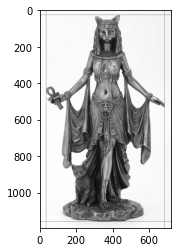

In [38]:
plt.imshow(dfalt,cmap='gray') #지정 표준편차 아래에서 바운더리 박스 생성

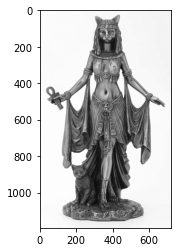

In [35]:
plt.imshow(imageDF,cmap='gray')

In [36]:
#파이썬으로 나만의 기준을 가지고 사진을 조작해보자
images = []
for i in range(20):
    images.append(imageDF + random.randint(1, 255))
imageio.mimsave('0.dataSet/images/result.gif', images)


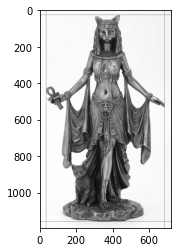

In [37]:
plt.imshow(dfalt,cmap='gray')

In [13]:
imageDF[0].idxmin()
imageDF[0].idxmax()

517